**COVID-19 DETECTION USING CNN**

**Aim**: To develop a Convolution neural network(CNN) model to detect COVID-19 case, Viral Pneumonia case ,Noraml case,from the givern X-ray images.This model can be used to help healthcare providers quickly and accurately

**importing the required libraries**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [37]:
os.listdir('/content/drive/MyDrive/project data/test')

['Viral Pneumonia', 'Covid', 'Normal']

In [38]:
os.listdir('/content/drive/MyDrive/project data/train')

['Covid', 'Normal', 'Viral Pneumonia']

In [39]:
#training set
datadir='/content/drive/MyDrive/project data/train'
X_train=[]
y_train=[]
categories=['Covid', 'Normal', 'Viral Pneumonia']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(category))
  print("Category",category,"loaded")




Category Covid loaded
Category Normal loaded
Category Viral Pneumonia loaded


In [40]:
#testing set
datadir='/content/drive/MyDrive/project data/test'
X_test=[]
y_test=[]
categories=['Covid', 'Normal', 'Viral Pneumonia']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(category))
  print("Categories",category,"loaded")

Categories Covid loaded
Categories Normal loaded
Categories Viral Pneumonia loaded


In [41]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [42]:
X_train.shape

(251, 150, 150, 1)

In [43]:
X_test.shape

(66, 150, 150, 1)

In [44]:
y_train.shape

(251,)

In [45]:
y_test.shape

(66,)

**CNN MODEL**

In [46]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
c=model.fit(X_train,y_train,epochs=20)

Epoch 1/20
8/8 [==============================] - 1s 15ms/step - loss: 2.6781 - accuracy: 0.4781
Epoch 2/20
8/8 [==============================] - 0s 13ms/step - loss: 0.6323 - accuracy: 0.7092
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 0.3747 - accuracy: 0.8765
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.2603 - accuracy: 0.9044
Epoch 5/20
8/8 [==============================] - 0s 13ms/step - loss: 0.2136 - accuracy: 0.9203
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.1691 - accuracy: 0.9482
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1393 - accuracy: 0.9482
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0996 - accuracy: 0.9721
Epoch 9/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0868 - accuracy: 0.9801
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0669 - accuracy: 0.9761
Epoch 11/20
8/8 [============

In [49]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.9091


[0.27893680334091187, 0.9090909361839294]

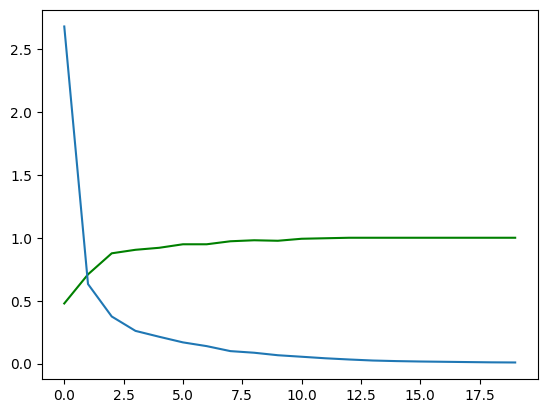

In [50]:
plt.plot(c.history['accuracy'],color='green',label='Accuracy')
plt.plot(c.history['loss'],label='Accuracy')


**Predicting new image**

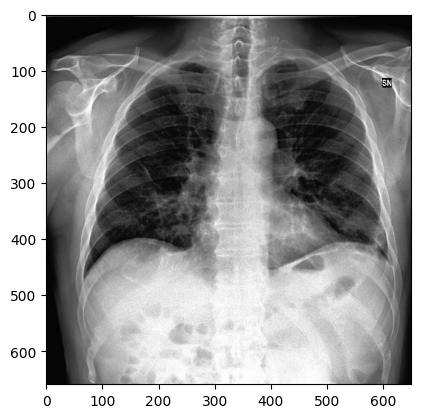

In [51]:
img=imread('/content/drive/MyDrive/project data/test/Covid/0100.jpeg')
plt.imshow(img)

In [52]:
img=resize(img,(150,150,1))
img=img.reshape(1,150,150,1)
y=model.predict(img)
ind=y.argmax()
print(categories[ind])

1/1 [==============================] - 0s 51ms/step
Covid


**RESULT:**Proposed CNN model gives 90% accuracy in X-ray image classification

**SAVING THE MODEL**

In [53]:
import pickle

In [54]:
#saving the trained model
filename='cnn_model.h5'
pickle.dump(model,open('cnn_model.h5','wb'))

In [55]:
#loading the saved model
loaded_model=pickle.load(open('cnn_model.h5','rb'))